<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/01_Calculo/04_Derivadas/01_Derivadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivadas
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019
*   Autores: 
    - Ingrid Pamela Ruiz Puga
    - Luis M. de la Cruz Salas
*   Rev: lun nov  9 12:23:01 CST 2020

In [1]:
# COLAB
#!git clone https://github.com/jugernaut/Prometeo.git

# Linux y/o MacOS
import os, sys
sys.path.insert(0, os.path.abspath('../../'))

# Windows
# ...

import Utils.gutils as vis
#from sympy import limit, Symbol, oo
#import math
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

## Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

### Ejemplo 1: La curva del olvido

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

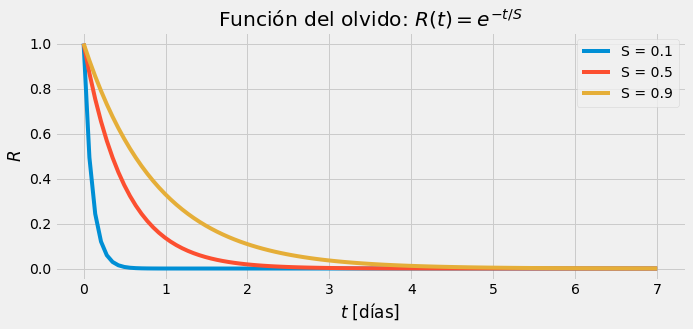

In [2]:
R = lambda t, S: np.exp(-t/S)
t = np.linspace(0, 7, 100)

par = [{'title':'Función del olvido: $R(t) = e^{-t/S}$', 
        'xlabel':'$t$ [días]',
        'ylabel':'$R$'}
      ]

graf = vis.planoCartesiano(par=par)
for S in [0.1, 0.5, 0.9]:
    graf.plot(x= t, y= R(t, S), par={'label':'S = {}'.format(S)})
graf.legend()
graf.show()

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica el descenso es más rápido?, en otras palabras, ¿en qué parte de la gráfica el olvido se incrementa? Para conocer ese descenso, debemos calcular la pendiente y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1}
$$

Como es obvio, este valor de la pendiente cambiará cuando $t_1$ y $t_2$ cambien. Definamos entonces $h = t_2 - t_1$ y $t = t_1$. Con ello podemos escribir:

$$
m(t) = \frac{R(t + h) - R(t)}{h}
$$

En esta última fórmula vemos que la pendiente depende de $t$.
Vamos a calcular $m$ para $h = 1$ y $t = [0,1,2,3,4,5,6]$:

In [3]:
S = 0.9
h = 1.0
td = np.arange(0,8,h) 
m = np.zeros(len(td))

for i,x in enumerate(td):
    m[i] = (R(x + h, S) - R(x, S)) / h

tabla = pd.DataFrame(np.array([td, m, ]).T, columns = ['t', 'm(t)'])
tabla

,t,m(t)
0,0.0,-0.670807
1,1.0,-0.220825
2,2.0,-0.072694
3,3.0,-0.023930
4,4.0,-0.007878
5,5.0,-0.002593
6,6.0,-0.000854
7,7.0,-0.000281


Observamos que la pendiente es negativa, lo cual indica un decrecimiento. También, la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$ se incrementa. Es posible visualizar la pendiente uniendo los puntos con los que se realizó el cálculo de la misma, y también se puede graficar como función del tiempo veamos ambas cosas en las siguientes gráficas:

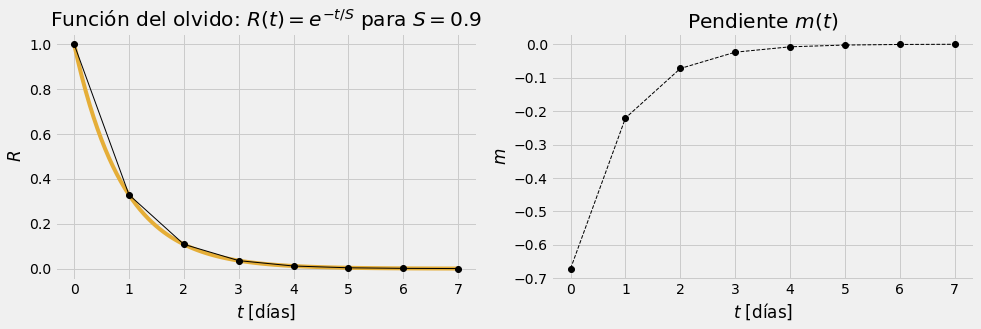

In [4]:
par = [{'title':'Función del olvido: $R(t) = e^{-t/S}$ para $S = 0.9$', 
        'xlabel':'$t$ [días]',
        'ylabel':'$R$'},
       {'title':'Pendiente $m(t)$', 
        'xlabel':'$t$ [días]',
        'ylabel':'$m$'},
      ]
graf = vis.planoCartesiano(1,2, par=par, par_fig={'figsize':(14,5)})
graf.plot(1, x = t, y = R(t, S), par={'color':'C2'})
graf.plot(1, x = td, y = R(td,S), par={'lw':1,'color':'black', 'marker':'o','zorder':5})
graf.plot(2, x = td, y = m, par={'ls':'--', 'lw':1, 'color':'black', 'marker':'o','zorder':5})
graf.show()

En la gráfica de la izquierda, la línea negra nos muestra gráficamente el cambio en la pendiente de la recta que une los puntos de la gráfica de $R(t)$. En la gráfica de la derecha, observamos el cámbio de la pendiente $m$ en función de $t$.

Lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$. Esto es lo que expresa la fórmula de $m(t)$. 

¿Será posible calcular **la razón de cambio instantáneo**? Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (división por cero!). Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h}
$$

En la siguiente visualización puedes modificar $S$, $h$ y $t$. Observa lo que sucede cuando $h \to 0$. 

In [5]:
# LINUX y MACOS
%run "./02_Derivadas_interactive.ipynb"

# WINDOWS
#%run "D:\\GitSites\\PAPIME_PE101019_Materiales\\01_Calculo\\04_Derivadas\\02_Derivadas_interactive.ipynb"

# Google Colab
#%run "/content/Prometeo/01_Calculo/04_Derivadas/02_Derivadas_interactive.ipynb"

interactive(children=(FloatSlider(value=0.9, description='S', max=0.9, min=0.1, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0)>

Conforme $h$ se hace más pequeño, observamos que la línea roja se aproxima cada vez mejor a la línea tangente que pasa por el punto rojo. Dicha línea representa una aproximación a la razón de cambio instantánea en el punto rojo.
Entonces, la tangente en el punto rojo, no es otra cosa que la razón de cambio instantánea. Veremos enseguida que ambas cosas se representan un concepto conocido como *la derivada de la función* en el punto rojo.

## Definición de derivada

En todos los libros de cálculo encontrarás la siguiente definición y notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} 
$$

La derivada existe siempre y cuando exista el límite. ¿Puedes imaginar cuando este límite no existe? Observe que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$, ¿cuándo es que esta pendiente no se puede calcular?

Para tener una mejor idea de lo que este límite significa vea el siguiente interactivo.

In [ ]:
# LINUX y MACOS
%run "./03_Derivadas_interactive.ipynb"

# WINDOWS
#%run "D:\\GitSites\\PAPIME_PE101019_Materiales\\01_Calculo\\04_Derivadas\\03_Derivadas_interactive.ipynb"

# Google Coolab
#%run "/content/Prometeo/01_Calculo/04_Derivadas/03_Derivadas_interactive.ipynb"

### Ejemplo 2

Consideremos la función $f(x) = x^3$ y apliquemos la definición de derivada:

$$
\frac{d f}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = \lim_{h \to 0} \frac{(x + h)^3 - x^3}{h}
$$

Si expandimos los términos del numerador obtenemos:

$$
\frac{d f}{dx} = \lim_{h \to 0} \, (3x^2 + 3 x h + h ^2)
$$

Al calcular el límite de la derecha obtenemos:

$$
\frac{d f}{dx} = 3x^2
$$

Hemos calculado la derivada analítica de $f(x) = x^3$. Veamos como se ven $f(x)$ y $f^\prime(x)$:

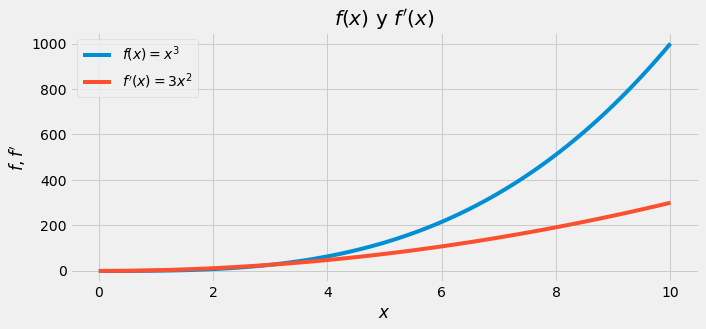

In [6]:
par = [{'title':'$f(x)$ y $f^\prime(x)$', 
        'xlabel':'$x$',
        'ylabel':'$f, f^\prime$'}
      ]
x = np.linspace(0,10,100)
graf = vis.planoCartesiano(par=par)
graf.plot(x = x, y = x**3, par={'label':'$f(x)=x^3$'})
graf.plot(x = x, y = 3*x**2, par={'label':'$f^\prime(x)=3x^2$'})
graf.legend()
graf.show()

## Reglas de derivación

En general es fácil calcular la derivada de cualquier función y existen reglas para hacerlo más fácil.
 

**Regla de potencias**

Para cualquier número real $n$ si $f(x)= x^n$, entonces
$$
f(x) = n * x^{n-1}
$$

**Regla de la función constante**

Si $f(x)=c$ es una función constante, entonces
$$ 
f^\prime(x)=0 
$$

**Regla de la multiplicación por constante**

Si $c$ es cualquier constante y $f(x)$ es diferenciable, entonces $g(x)= c f(x)$ también es diferenciable y su derivada es:
$$ 
g^\prime(x) = c f(x) 
$$

**Regla de suma y diferencia**

Si $f(x)$ y $g(x)$ son diferenciables, entonces $f(x) + g(x)$ y $f(x) - g(x)$ también son diferenciables y sus derivadas son:
$$ 
[f(x)+ g(x)]^\prime = f^\prime(x) + g^\prime(x) 
$$

$$ 
[f(x)- g(x)]^\prime=f^\prime(x) - g^\prime(x) 
$$

**Regla del producto**

Si $f(x)$ y $g(x)$ son funciones diferenciables, entonces $f(x)g(x)$ es diferenciable y su derivada es:
$$ 
[f(x) g(x)]^\prime= f(x)g^\prime(x) + g(x)f^\prime(x) 
$$

**Regla del cociente**

Si $f$ y $g$ son funciones diferenciables y $g(x) \neq 0$, entonces $f(x)/g(x)$ es diferenciable y su derivada es: 
$$  
\left[\frac{f(x)}{g(x)} \right] = \frac{f(x)g^\prime(x)- f(x)g^\prime(x) }{g(x)^2}
$$

**Regla  de la cadena**

Si la función $f(u)$ es diferenciable, donde $u = g(x)$, y la función $g(x)$ es diferenciable, entonces la composición $y=(f \circ g)(x)= f(g(x))$ es diferenciable:
$$ 
f(g(x))^\prime = f^\prime(g(x)) \cdot g^\prime(x)  
$$

**Regla de L’Hôpital**

Esta regla es utilizada en caso de indeterminaciones donde $f(x)$ y $g(x)$ son dos funciones continuas definidas en el intervalo $[a,b]$, derivables en $(a,b)$ y sea $c$ perteneciente a $(a,b)$ tal que $f(c)=g(c)=0$ y $g^\prime(x) \neq 0$ si $x \neq c$. Si existe el límite $L$ de $f^\prime/g^\prime$ en $c$, entonces existe el límite de $f(x)/g(x)$ (en $c$) y es igual a $L$. Por lo tanto:
$$ 
\lim_{x \to c} \frac{f(x)}{g(x)} = \lim_{x \to c} \frac{f^\prime(x)}{g^\prime(x)} = L 
$$

**Derivadas de funciones trigonométricas**

$$
\begin{eqnarray}
\sin^\prime(x) & = & \cos(x) \\ 
\tan^\prime(x) & = & \sec^2(x) \\
\sec^\prime(x) & = & \sec(x)tan(x) \\
\cos^\prime(x) & = & -\sin(x) \\
\cot^\prime(x) & = & -\csc^2(x) \\
\csc^\prime(x) & = & -\csc(x)cot(x)
\end{eqnarray}
$$



***
**Teorema de Rolle :**
Sea $a < b$ y suponga que $f : [a, b] → {\mathbb{R}}$ es derivable en $(a, b)$ y continua
en $[a, b]$ y $f(a) = f(b)$. Entonces $∃ x_0 ∈ (a, b)$ tal que $f^\prime(x_0) = 0$
***
Lo anterior quiere decir que, dadas las condiciones del teorema, es posible encontrar un punto de la función $f(x)$ dentro del intervalo $(a,b)$ donde la derivada, esto es la línea tangente, es cero, en otras palabras, en ese punto la línea tangente es horizontal. 

### Ejemplo 3

Considere la función $f(x)= x^2 + 5$, la cual es continúa en todo $\mathbb{R}$. Tomemos el intervalo $[-5,5]$ y hagamos la gráfica de esta función. Observe en la gráfica que sigue, que se cumplen las condiciones del Teorema de Rolle y por lo tanto es posible encontrar un punto $c$, punto rojo, donde la derivada es cero (línea roja).

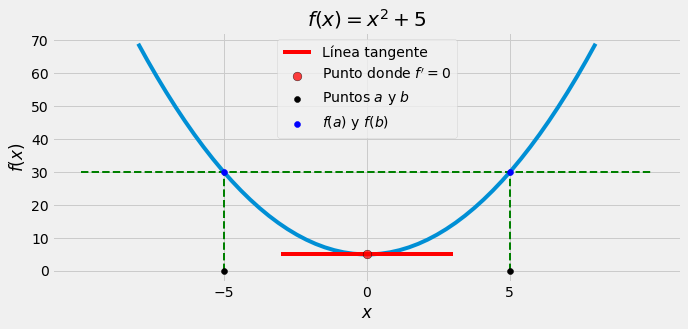

In [39]:
f = lambda x: x**2 + 5

#def x_c1(x):  
#    return 5

x = np.linspace(-8, 8, num=50)

par = [{'title':'$f(x)=x^2 + 5$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x= x, y = f(x))

graf.plot(x=[-3,3],y=[f(0),f(0)],par={'label':'Línea tangente','c':'red'})

graf.scatter(x=0, y=f(0), par={'label':'Punto donde $f^\prime= 0$','fc':'red', 'ec':'black', 'alpha':0.75, 's':75, 'zorder':10})
graf.scatter(x=[-5,5], y=[0,0], par={'label':'Puntos $a$ y $b$','color':'black', 'zorder':10})
graf.scatter(x=[-5,5], y=[f(-5),f(5)], par={'label':'$f(a)$ y $f(b)$','color':'blue', 'zorder':10})

graf.plot(x=[-10,10],y=[f(-5),f(5)],par={'c':'green','ls':'--','lw':2})
graf.plot(x=[-5,-5],y=[0,f(-5)],par={'c':'green','ls':'--','lw':2})
graf.plot(x=[5,5],y=[0,f(5)],par={'c':'green','ls':'--','lw':2})

graf.ticks(xticks=[-5,0,5])
graf.legend()
graf.show()

## Derivadas de orden superior

Es posible obtener la derivada de la derivada, es decir, si tenemos una función $f(x)$ cuya derivada es $f^\prime(x)$, entonces podemos calcular la derivada a esta última función, para obtener $f^{\prime\prime}(x)$, a esta última función, si es que existe, se le conoce como la segunda derivada de $f(x)$. También se puede denotar a la segunda derivada com $f^{(2)}(x)$.

En general, si $f(x)$ es derivable $k$ veces, entonces es posible obtener la $k$-ésima derivada de dicha función, que se escribe como:
$$ 
\frac{d^kf(x)}{dx^k} = f^{(k)}(x)
$$

### Ejemplo 4

Calcular la cuarta derivada de $f(x)= 3x^4 + 2x^2 - 20$.
  
Para calcular la derivada solicitada de $f(x)$ se deben realizar los cálculos recursivos desde la primera derivada de la función:

$$
\begin{eqnarray}
f^\prime(x) & = & 12x^3 + 4x \\
f^{(2)}(x) & = & 36x^2 + 4 \\
f^{(3)}(x) & = & 72x  \\
f^{(4)}(x) & = & 72 \\
\end{eqnarray}  
$$ 

Observe las gráficas de cada función y explique el comportamiento de cada una de ellas.

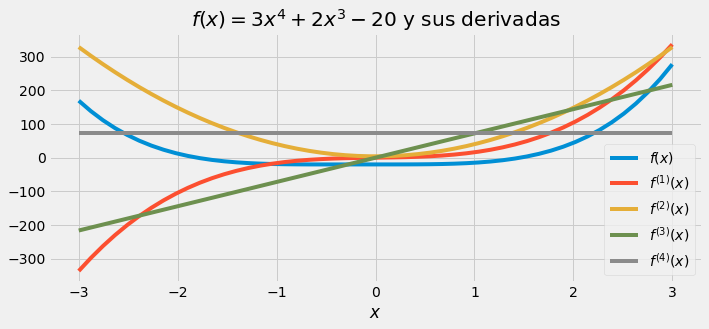

In [53]:
f = lambda x: 3*x**4 + 2*x**3 -20
f1 = lambda x: 12*x**3 + 4*x
f2 = lambda x: 36*x**2 + 4
f3 = lambda x: 72*x
f4 = lambda x: 72*np.ones(len(x))

x = np.linspace(-3, 3, num=50)

par = [{'title':'$f(x)=3x^4 + 2x^3 -20$ y sus derivadas', 
        'xlabel':'$x$',
        'ylabel':''}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x = x, y = f(x), par={'label':'$f(x)$'})
graf.plot(x = x, y = f1(x), par={'label':'$f^{(1)}(x)$'})
graf.plot(x = x, y = f2(x), par={'label':'$f^{(2)}(x)$'})
graf.plot(x = x, y = f3(x), par={'label':'$f^{(3)}(x)$'})
graf.plot(x = x, y = f4(x), par={'label':'$f^{(4)}(x)$'})
graf.legend()
graf.show()

### Ejemplo 5

1. Utilizando la regla de L'Hopital encuentra el límite de $\displaystyle f(x)=\frac{\sin(x)}{x}$ cuando $x$ tiende a cero.
2. Encuentra la primera y segunda derivada de la siguientes funciones:
- a) $f(x)= x^5 - 2x^3 + x$ 
- b) $f(x)= 4 \cos x^2$

 **Solución**

1. Al cumplirse las condiciones de la regla podemos asegurar que:
 $$ \lim_{x \to 0} \frac{\sin (x)}{x} = \lim_{x \to 0} \frac{\sin^\prime(x)}{x^\prime} = \lim_{x \to 0} \frac{\cos(x)}{1}=1$$

2.a) Aplicando las reglas de derivación obtenemos:
  $$f^\prime(x)= 5x^4 - 6x^2 +1$$ 
  $$f^{\prime\prime}(x)= 20x^3 - 12 x $$ 

2.b) Aplicando las regla de la cadena obtenemos:
  $$f^\prime(x)= -4 \sin x^2(2x) = -8x \sin x^2$$ 
  $$f^{\prime\prime}(x)= -8 \sin x^2 -8x (\cos x^2(2x)) = -8 \sin x^2 -16x^2 (\cos x^2)$$ 

## Máximos y mínimos relativos, regiones de concavidad y puntos de inflexión 

Definiciones:

*   **Máximo absoluto:** Es un número $f(c_1)$ de una función tal que $f(x)\leq f(c_1)$ para toda *x* en el dominio de *f*
*   **Mínimo absoluto:** Es un número $f(c_2)$ de una función tal que $f(x)\geq f(c_2)$ para toda *x* en el dominio de *f*
*   **Máximo relativo:** Es un número $f(c_1)$ de una función tal que $f(x)\leq f(c_1)$ para toda *x* en algún intervalo abierto que contiene a $c_1$.
*   **Mínimo relativo:** Es un número $f(c_2)$ de una función tal que $f(x)\geq f(c_1)$ para toda *x* en algún intervalo abierto que contiene a $c_1$.
*   **Punto crítico:** El punto crítico de una función *f* es un número *c* en su dominio para el cual $f´(c)=0$ o $f´(c)$ no existe.
*   **Concavidad:** Si *f* es una función diferenciable y $f´$ es una función *creciente* en *(a,b)* se dice que la función es cóncava.
*   **Convexidad:** Si *f* es una función diferenciable y $f´$ es una función *decreciente* en *(a,b)* se dice que la función es convexa.
*   **Punto de inflexión:** Si *f* es continua sobre un intervalo *(a,b)* que contiene al número *c* se llama punto de inflexión a $(c,f(c))$si en dicho punto hay una recta tangente y la gráfica cambia de concavidad en este punto. Suponiendo que $(c,f(c))$  es punto de inflexión para $f$, entonces $f´´(c)=0$ o $f´´(c)$ no existe.

No todas las funciones tiene máximo o mínimo absoluto como ejemplo tenemos a las funciones lineales las cuales no tienen dichos puntos. Algunas veces es sencillo identificar gráficamente estos puntos.

### Teorema de la unicidad del punto crítico
Suponiendo que $c$ es el **único** punto crítico de una función $f$ dentro de un intervalo. Si se demuestra que $f(c)$ es un extremo relativo, entonces $f(c)$ es un extremo absoluto.

### Criterio de la primera derivada
Sea $f$ una función continua sobre $[a,b]$ y diferenciable sobre $(a,b)$  excepto posiblemente en $c$ punto crítico, entonces $f(c)$ puede clasificarse como sigue.

1. Si $f'(x)$ cambia de negativa a positiva en $c$, entonces $f(c)$ es un mínimo relativo.

2. Si $f'(x)$   cambia de positiva a negativa en $c$, entonces $f(c)$ es un máximo relativo.

3. Si $f'(x)$   es positiva en ambos lados de $c$ o negativa en ambos lados de $c$, entonces $f(c)$ no es ni un mínimo ni un máximo relativo. 

### Teorema del valor extremo
Existe un teorema el cual facilita conocer si una función tiene un máximo y un mínimo absoluto, pues en caso de tener una función continua en un intervalo cerrado aseguramos que existen $f(c_1)$ y $f(c_2)$ tales que $f(c_1)\geq f(x)\leq f(c_2)$ llamados el mínimo y el máximo respectivamente.

**Enunciado**

Una función $f$ continua sobre un intervalo cerrado $[a,b]$ siempre tiene un máximo absoluto y un mínimo absoluto sobre el intervalo.

### Criterio de la segunda derivada
Sea $f$ una función con su primera derivada definida, al menos, en un intervalo abierto $(a,b)$ conteniendo al número $c$. Si $f´´$ esta definida entonces podemos considerar los siguiente aspectos: 

1.  Si $f´´(c) < 0$  entonces se dice que $f(c)$ es un máximo relativo.

2.  Si $f´´(c) > 0$ entonces se dice que $f(c)$ es un mínimo relativo. 

### Teorema de funciones crecientes y decrecientes
Es posible conocer si una función es creciente o decreciente en un intervalo mediante el uso de derivadas.

**Enunciado**

Sea $f$ una función continua sobre $[a,b]$ y diferenciable sobre $(a,b)$.
1.   Si $f´(x) > 0$ para toda $x$ en $(a,b)$, entonces la función $f$ es *creciente* sobre el intervalo $[a,b]$
2.   Si $f´(x) < 0$ para toda $x$ en $(a,b)$, entonces la función $f$ es *decreciente* sobre el intervalo $[a,b]$

### Teorema de concavidad
Para conocer la concavidad de una función es de gran utilidad el uso del siguiente teorema.

**Enunciado**

Sea $f$ una función para la cual la segunda derivada existe sobre un intervalo $(a,b)$
1.   Si $f´´(x) > 0$ para toda $x$ en $(a,b)$ entonces la gráfica de $f$ es    cóncava sobre $(a,b)$.
2.    Si $f´´(x) < 0$ para toda $x$ en $(a,b)$ entonces la gráfica de $f$ es    convexa sobre $(a,b)$. 


### Ejemplo 6

4.   Encuentra el mínimo y máximo relativo de la siguiente función:
$$f(x)= 4x^4 - 4x^2$$

 **Solución**

 Graficaremos la función para poder visualizarla y observar que *f* es una función simétrica.

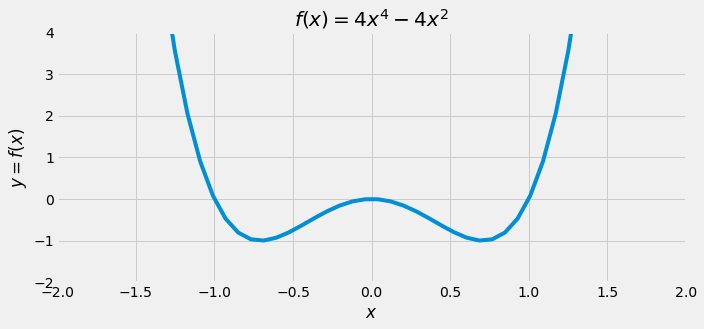

In [8]:
f = lambda x: 4*x**4 - 4*x**2

x = np.linspace(-4, 4, 100)

par = [{'title':'$f(x)= 4x^4 - 4x^2$', 
        'xlabel':'$x$',
        'ylabel':'$y=f(x)$',
       'ylim':(-2,4), 'xlim':(-2,2)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x= x, y= f(x))
graf.show()

Para encontrar los puntos críticos calculamos la primera derivada de $f(x)= 4x^4 - 4x^2$ y la igualamos a cero:
$$
f^\prime(x) = 16x^3 - 8x = 0
$$

Esta ecuación tiene tres raíces, las cuales son: 0, $ \frac{\sqrt2}{2}$, $ - \frac{\sqrt2}{2}$. ¿Puede verificar que son puntos críticos?

Ahora aplicamos el criterio de la segunda derivada para conocer que tipo de puntos críticos tenemos:

$$
f´´(x) = 48x^2 - 8
$$

Por lo que al evaluar dichos puntos en la segunda derivada obtenemos:

$$
\begin{array}{cccc}
x & \text{Signo de }f´´(x) & f(x) & \text{Punto} \\
\hline
0 & - & 0 & \text{máximo relativo} \\
\frac{\sqrt2}{2} & + & -1 & \text{ mínimo relativo} \\
- \frac{\sqrt2}{2} & + & -1 & \text{ mínimo relativo}
\end{array}
$$

Es posible observar que se tienen dos puntos de inflexión que se encuentran en $\pm \frac{\sqrt6}{6}$  pues es simétrica.

Veamos lo anterior gráficamente:

/home/luiggi/GitSites/Prometeo/Utils/gutils.py:182: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  return self.__ax[n-1].annotate(**par)


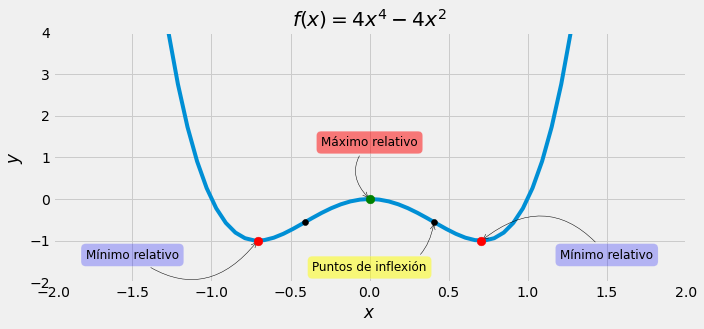

In [54]:
f = lambda x: 4*x**4 - 4*x**2

x = np.linspace(-2, 4, num=100)

par = [{'title':'$f(x)= 4x^4 - 4x^2$', 
        'xlabel':'$x$',
        'ylabel':'$y$',
       'ylim':(-2,4), 'xlim':(-2,2)}
      ]

x1 = np.sqrt(2)/2
x2 = np.sqrt(6)/6

graf = vis.planoCartesiano(par=par)
graf.plot(x = x, y = f(x))
graf.scatter(x=[-x1, x1], y=[f(-x1), f(x1)], par={'s':75,'color':'red', 'zorder':10})
graf.scatter(x=[0], y=[f(0)], par={'s':75, 'color':'green', 'zorder':10})
graf.scatter(x=[-x2, x2], y=[f(-x2), f(x2)], par={'color':'black', 'zorder':10})

graf.annotate(par={'s':'Máximo relativo', 'xy':(0, 0), 'xytext':(-0,50), 'fontsize':12,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.4, 'fc':'red', 'alpha':0.5},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})

graf.annotate(par={'s':'Mínimo relativo', 'xy':(-x1, f(-x1)), 'xycoords':'data',
                   'xytext':(-1.5,-1.5), 'fontsize':12,
                   'textcoords':'data', 'ha':'center', 'va':'bottom',
                   'bbox':{'boxstyle':'round','pad':0.4, 'fc':'blue', 'alpha':0.25},
                   'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'black'}})                  

graf.annotate(par={'s':'Mínimo relativo', 'xy':(x1, f(x1)), 'xycoords':'data',
                   'xytext':(1.5,-1.5), 'fontsize':12,
                   'textcoords':'data', 'ha':'center', 'va':'bottom',
                   'bbox':{'boxstyle':'round','pad':0.4, 'fc':'blue', 'alpha':0.25},
                   'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'black'}})  

graf.annotate(par={'s':'Puntos de inflexión', 'xy':(x2, f(x2)), 'xycoords':'data',
                   'xytext':(0,-1.8), 'fontsize':12,
                   'textcoords':'data', 'ha':'center', 'va':'bottom',
                   'bbox':{'boxstyle':'round','pad':0.4, 'fc':'yellow', 'alpha':0.5},
                   'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'black'}})
graf.show()

## Referencias

*   Matemáticas 1 :cálculo diferencial / Dennis G. Zill, Warren S. Wright ; adaptación y revisión técnica, Joel Ibarra Escutia ; [traductores: Hugo Villagómez Velazquéz y Gabriel Nagore Cázar
*   Cálculo 1 de una variable / Ron Larson, Bruce H. Edwards